In [1]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision.datasets as datasets
import torch
from torch.optim import Adam, SGD

In [2]:
class MnistModel(nn.Module):
  def __init__(self) -> None:
      super().__init__()
      self.lin1 = nn.Linear(784, 256)
      self.lin2 = nn.Linear(256, 64)
      self.lin3 = nn.Linear(64, 10)

  def forward(self, X):
      x1 = F.relu(self.lin1(X))
      x2 = F.relu(self.lin2(x1))
      x3 = F.relu(self.lin3(x2))
      return x3

  # Fit function
  def fit(self, X, y, optimizer, loss_fn, epochs):

    for epoch in range(epochs):

      ypred = self.forward(X)
      loss = loss_fn(ypred, y)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()


In [3]:
# Data fetching

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

X_train = mnist_trainset.data
X_train = X_train.float().flatten(start_dim=1, end_dim=2)
Y_train = mnist_trainset.targets

In [5]:
numpydatas = X_train[0].numpy()

print(X_train.type())
print(Y_train.type())



torch.FloatTensor
torch.LongTensor


In [6]:
model = MnistModel()

# Adam for local training phase and first 50 epochs of collaborative phase
# SGD is for the last 50 epochs of the collaborative phase
optim_adam = Adam(model.parameters(), lr=5e-4)
optim_sgd = SGD(model.parameters(), lr=1e-3)

# Loss function is same for all epochs
loss_fn = nn.CrossEntropyLoss()



In [7]:
print(X_train.dtype)
print(Y_train.dtype)

torch.float32
torch.int64


In [ ]:
model.fit(X_train, Y_train, optimizer=optim_adam, loss_fn=loss_fn, epochs=100)

KeyboardInterrupt: 

In [ ]:
results_onehot = model.forward(X_train)
results = torch.argmax(results_onehot, dim=1)
output = torch.softmax(results_onehot, dim=1)
error = torch.mean((results != Y_train).float())
print(error)

print(output.shape)
print(output[2])
print(Y_train[2])

tensor(0.4344)
torch.Size([60000, 10])
tensor([0.0064, 0.0064, 0.0064, 0.0064, 0.9423, 0.0064, 0.0064, 0.0064, 0.0064,
        0.0064], grad_fn=<SelectBackward0>)
tensor(4)


In [ ]:
import cv2

image = "image.png"

img = cv2.imread(image,cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
resized = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)  #Resize the data to the MNIST dimensions
features = resized.reshape(1,-1) #Get the image in the form of an array

cv2.imshow('M', resized)

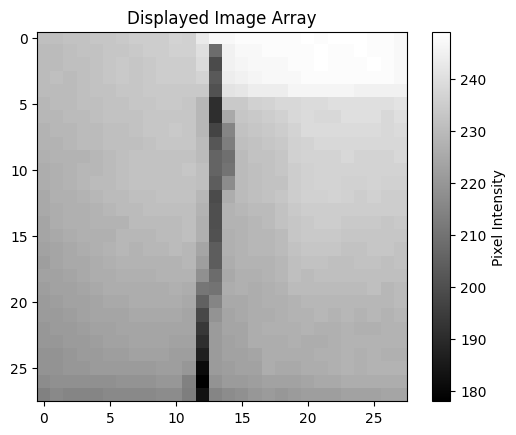

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(resized, cmap='gray') # 'gray' colormap is suitable for 2D grayscale arrays
plt.title("Displayed Image Array")
plt.colorbar(label='Pixel Intensity') # Add a color bar for better interpretation
plt.show()

In [ ]:
features = torch.from_numpy(features)
features = features.float()

model.forward(Xtest)

TypeError: expected np.ndarray (got Tensor)

In [ ]:
print(features.shape)
print(features.type)

torch.Size([1, 784])
<built-in method type of Tensor object at 0x7f899b505fd0>
